In [3]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [4]:
tf.__version__

'2.8.0'

In [5]:
tf.config.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [6]:
mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
y_train_full.shape

(60000,)

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
X_train_full.dtype

dtype('uint8')

## Scaling the data to make it from 0 to 1 and can easily interpret 

In [11]:
X_valid, X_train = X_train_full[:5000] / 255.0 , X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


(-0.5, 27.5, 27.5, -0.5)

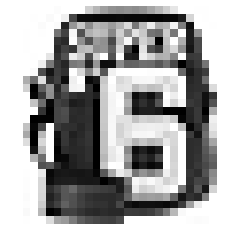

In [12]:
plt.imshow(X_train[1000], cmap="binary")
plt.axis("off")


<AxesSubplot:>

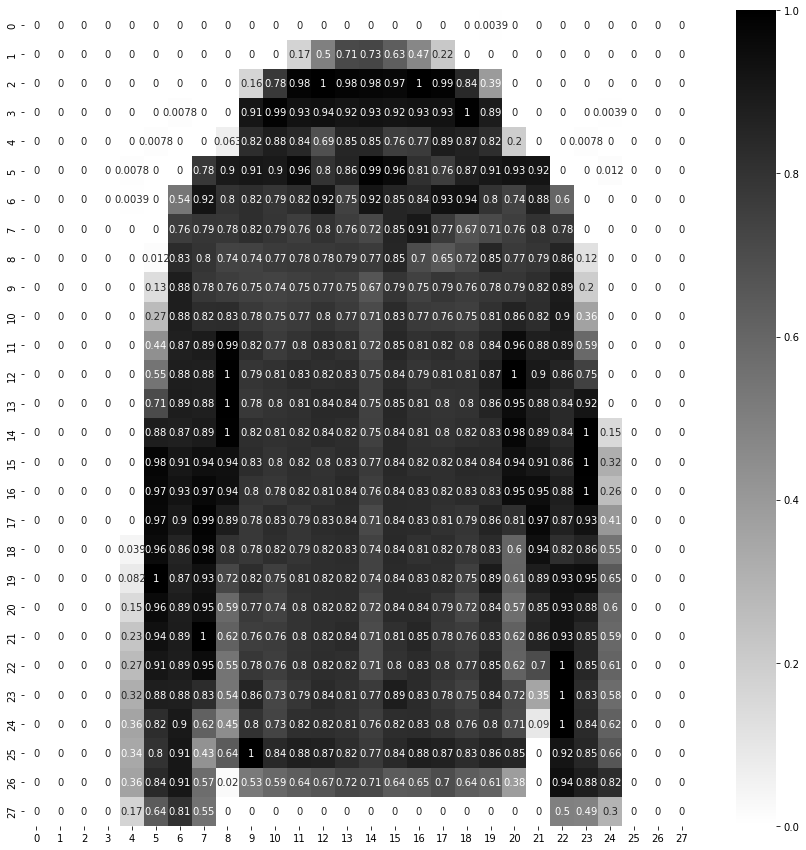

In [13]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [14]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

In [15]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [16]:
model_clf.layers

In [17]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [19]:
hidden1.get_weights()

[array([[ 0.01572869,  0.01588336,  0.01019763, ..., -0.01860704,
          0.04897053, -0.07172294],
        [ 0.03008044, -0.05931771, -0.02910909, ...,  0.03253183,
         -0.05335513,  0.04336815],
        [-0.00102071, -0.02557027,  0.00477054, ...,  0.02168357,
          0.02692736, -0.03374579],
        ...,
        [-0.02296123,  0.00760785,  0.05948679, ..., -0.00258864,
         -0.05359872, -0.05406541],
        [-0.05331268,  0.00147785,  0.00608882, ...,  0.0328609 ,
         -0.04577246, -0.04578147],
        [ 0.01845755, -0.07257392,  0.01346631, ...,  0.02626035,
          0.0626784 , -0.01065894]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [20]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [21]:
import time
import os

def get_log_path(log_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  log_path = os.path.join(log_dir, fileName)
  print(f"saving logs at: {log_path}")
  return log_path

log_dir = get_log_path()

tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

saving logs at: logs/fit\log_2022_04_28_18_32_11


In [22]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [23]:

CKPT_path = "model_ckpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

In [24]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,
                                                                              checkpointing_cb])


Epoch 1/30
1719/1719 [==============================] - 8s 3ms/step - loss: 0.7158 - accuracy: 0.7677 - val_loss: 0.5135 - val_accuracy: 0.8266
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4897 - accuracy: 0.8296 - val_loss: 0.4567 - val_accuracy: 0.8474
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4458 - accuracy: 0.8435 - val_loss: 0.4869 - val_accuracy: 0.8148
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4180 - accuracy: 0.8532 - val_loss: 0.3996 - val_accuracy: 0.8630
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3977 - accuracy: 0.8598 - val_loss: 0.3889 - val_accuracy: 0.8652
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3814 - accuracy: 0.8642 - val_loss: 0.3851 - val_accuracy: 0.8622
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3681 - accuracy: 0.8699 - val_loss: 0.3559 - val_accuracy:

In [25]:
ckpt_model = tf.keras.models.load_model(CKPT_path)

history = ckpt_model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,
                                                                              checkpointing_cb])


Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2332 - accuracy: 0.9157 - val_loss: 0.2970 - val_accuracy: 0.8938
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2289 - accuracy: 0.9180 - val_loss: 0.2983 - val_accuracy: 0.8934
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2256 - accuracy: 0.9193 - val_loss: 0.3007 - val_accuracy: 0.8900
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2222 - accuracy: 0.9201 - val_loss: 0.2911 - val_accuracy: 0.8962
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2180 - accuracy: 0.9222 - val_loss: 0.2858 - val_accuracy: 0.8986
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2143 - accuracy: 0.9219 - val_loss: 0.3021 - val_accuracy: 0.8956
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2110 - accuracy: 0.9236 - val_loss: 0.3104 - val_accuracy:

In [26]:
import time 
import os

def savedModel_path(model_dir="TRAINED_MODEL"):
  os.makedirs(model_dir, exist_ok=True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(model_dir, fileName)
  print(f"model {fileName} will be saved at {model_path}")
  return model_path 

In [27]:
UNIQUE_PATH = savedModel_path()
UNIQUE_PATH

model Model_2022_04_28_18_36_22_.h5 will be saved at TRAINED_MODEL\Model_2022_04_28_18_36_22_.h5


'TRAINED_MODEL\\Model_2022_04_28_18_36_22_.h5'

In [28]:
tf.keras.models.save_model(model_clf, UNIQUE_PATH)

In [29]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 56.4333 - accuracy: 0.8575


[56.433319091796875, 0.8575000166893005]

In [30]:
X_new = X_test[:3]

y_prob = model_clf.predict(X_new)

y_prob.round(4)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [31]:
y_pred = np.argmax(y_prob, axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [32]:
y_test_new = y_test[:3]
y_test_new

array([9, 2, 1], dtype=uint8)

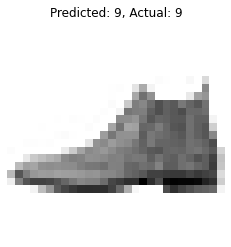

###########


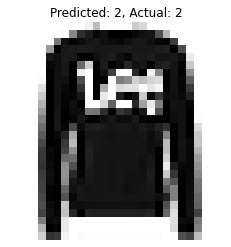

###########


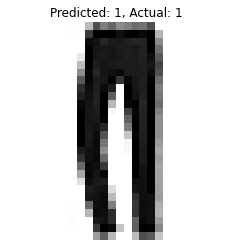

###########


In [33]:
for data, pred, actual in zip(X_new, y_pred, y_test_new):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("###########")



In [34]:
%load_ext tensorboard

In [35]:
%tensorboard --logdir logs/fit

Launching TensorBoard...

In [36]:
%pwd

'D:\\New folder (3)\\Faishon MNIST'

In [37]:
import tensorflow
